In [ ]:
from google.colab import drive
drive.mount('/content/drive') 


Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Emojify_dataset/

/content/drive/MyDrive/Emojify_dataset


In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.layers import MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [ ]:
data=pd.read_csv('fer2013.csv')

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data.emotion.unique() #diff emotion in dataset
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []
for index, row in data.iterrows():
    k=np.array(data.pixels.loc[index].split(' ')).reshape(48, 48, 1).astype('int')
    if row['Usage'] == 'Training':
        X_train.append(k)
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        X_test.append(k)
        y_test.append(row['emotion'])
        

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train= to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
train_datagen.fit(X_train)
val_datagen.fit(X_test)

In [ ]:
emotion_model = Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(BatchNormalization())
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))
emotion_model.add(BatchNormalization())
emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(512, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [ ]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 22, 22, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       7

In [ ]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
emotion_model_info = emotion_model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
         validation_data=val_datagen.flow(X_test, y_test,batch_size=64), epochs=50)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
449/449 [==============================] - 31s 46ms/step - loss: 2.0978 - accuracy: 0.2086 - val_loss: 1.8287 - val_accuracy: 0.2494
Epoch 2/50
449/449 [==============================] - 20s 45ms/step - loss: 1.8339 - accuracy: 0.2437 - val_loss: 1.7604 - val_accuracy: 0.2803
Epoch 3/50
449/449 [==============================] - 20s 45ms/step - loss: 1.7596 - accuracy: 0.2861 - val_loss: 1.6869 - val_accuracy: 0.3441
Epoch 4/50
449/449 [==============================] - 20s 45ms/step - loss: 1.6985 - accuracy: 0.3250 - val_loss: 1.6109 - val_accuracy: 0.3895
Epoch 5/50
449/449 [==============================] - 20s 44ms/step - loss: 1.6424 - accuracy: 0.3537 - val_loss: 1.5395 - val_accuracy: 0.4224
Epoch 6/50
449/449 [==============================] - 20s 45ms/step - loss: 1.5971 - accuracy: 0.3729 - val_loss: 1.4770 - val_accuracy: 0.4374
Epoch 7/50
449/449 [==============================] - 20s 45ms/step - loss: 1.5513 - accuracy: 0.3922 - val_loss: 1.4191 - val_accuracy:

In [ ]:
# emotion_model=keras.models.load_model('final_model.h5')

In [ ]:
from IPython import display

In [ ]:
def show_emoji(x):
  if x == 0:
    img = display.Image(url = "https://images.emojiterra.com/twitter/v13.0/512px/1f620.png", width = 200)
  elif x == 1:
    img = display.Image(url = "https://images.emojiterra.com/openmoji/v12.2/512px/1f922.png", width = 250)
  elif x == 2:
    img = display.Image(url = "https://images.emojiterra.com/google/android-11/512px/1f628.png", width = 200)
  elif x == 3:
    img = display.Image(url = "https://images.emojiterra.com/twitter/v13.0/512px/1f604.png", width = 200)
  elif x == 4:
    img = display.Image(url = "https://images.emojiterra.com/twitter/v13.0/512px/1f622.png", width = 200)
  elif x == 5:
    img = display.Image(url = "https://images.emojiterra.com/twitter/v13.0/512px/1f62f.png", width = 200)
  elif x == 6:
    img = display.Image(url = "https://images.emojiterra.com/twitter/v13.0/512px/1f610.png", width = 200)

  display.display(img)

In [ ]:
inputs = X_test[5].reshape(-1,48,48,1)
# query the network
predictions = emotion_model.predict(inputs)
label = np.argmax(predictions)
label

3

In [ ]:
# test the neural network 

# record to test
item = 50

# plot image
#plt.imshow(X_test[item].reshape(48,48), cmap='rainbow', interpolation='None')

# correct answer is first value
correct_label = label_to_text[np.argmax(y_test[item])]
print("correct label : ", correct_label)
# data is remaining values
inputs = X_test[item].reshape(-1,48,48,1)
# query the network
predictions = emotion_model.predict(inputs)
label = np.argmax(predictions)
print("network says: ", label_to_text[label])
show_emoji(np.argmax(y_test[item]))
# append correct or incorrect to list
if(correct_label==label_to_text[label]):
  print("match!")

pass

correct label :  anger
network says:  happiness


In [ ]:
from IPython import display

In [ ]:
def show_emoji(x):
  if x == 0:
    img = display.Image(url = "https://images.emojiterra.com/twitter/v13.0/512px/1f620.png", width = 200)
  elif x == 1:
    img = display.Image(url = "https://images.emojiterra.com/openmoji/v12.2/512px/1f922.png", width = 250)
  elif x == 2:
    img = display.Image(url = "https://images.emojiterra.com/google/android-11/512px/1f628.png", width = 200)
  elif x == 3:
    img = display.Image(url = "https://images.emojiterra.com/twitter/v13.0/512px/1f604.png", width = 200)
  elif x == 4:
    img = display.Image(url = "https://images.emojiterra.com/twitter/v13.0/512px/1f622.png", width = 200)
  elif x == 5:
    img = display.Image(url = "https://images.emojiterra.com/twitter/v13.0/512px/1f62f.png", width = 200)
  elif x == 6:
    img = display.Image(url = "https://images.emojiterra.com/twitter/v13.0/512px/1f610.png", width = 200)

  display.display(img)
    


In [ ]:
show_emoji(2)

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

<Figure size 432x288 with 0 Axes>

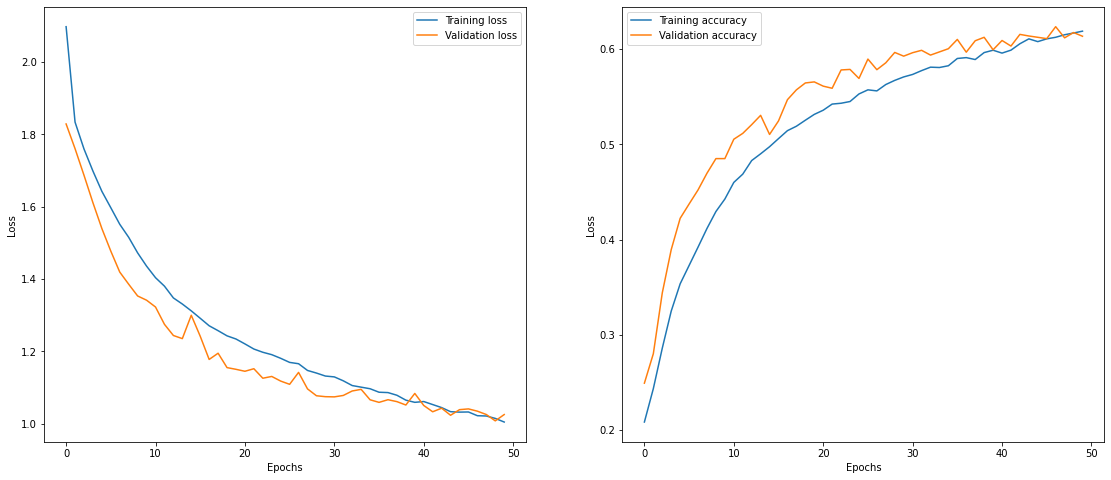

In [ ]:
plt.figure()
fig,(a1,a2)=plt.subplots(1,2,figsize=(19,8))

a1.plot(emotion_model_info.history['loss'])
a1.plot(emotion_model_info.history['val_loss'],)
a1.legend(['Training loss', 'Validation loss'])
a1.set(xlabel='Epochs',ylabel='Loss')

a2.plot(emotion_model_info.history['accuracy'])
a2.plot(emotion_model_info.history['val_accuracy'])
a2.legend(['Training accuracy', 'Validation accuracy'])
a2.set(xlabel='Epochs',ylabel='Loss')



In [ ]:
type(emotion_model.history)

NoneType

Text(0.5, 0, 'Epochs')

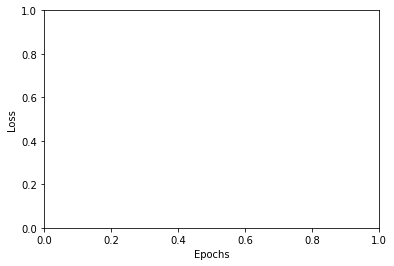